In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_iris

# New 2 libraries: pandas and seaborn.
# Pandas library is for manipulations and data analysis. It provides some useful data structures.
# Seaborn is based on matplotlib. With that we can draw attractive statistical graphics.
import pandas as pd
import seaborn as sb

from sortedcontainers import SortedList

#%matplotlib inline

# Plotting the iris.data.csv using pd.read_csv

In [2]:
# Name each column in iris.data.csv.
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

# Load the data into a Panda's dataframe.
# To see more about Pandas DataFrames visit: https://pandas.pydata.org/docs/reference/frame.html
# Note that numpy.genfromtxt is slower than pd.read_csv and additional
# Pandas Frames are better (we will see it later).
data = pd.read_csv('iris.data.csv', names=columns)

In [3]:
# Returns first 5 rows of the iris.data.csv labeled by columns.
data.head(n=5)

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Returns size of data.
data.shape

(150, 5)

In [5]:
# Generate descriptive statistics.
# Returns:
# (1) count - the number of each attribute,
# (2) mean - the mean of each attribute (i.e. column),
# (3) std - standard deviation,
# (4) min and max values,
# (5) 25%, 50%, 75% percentiles.
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

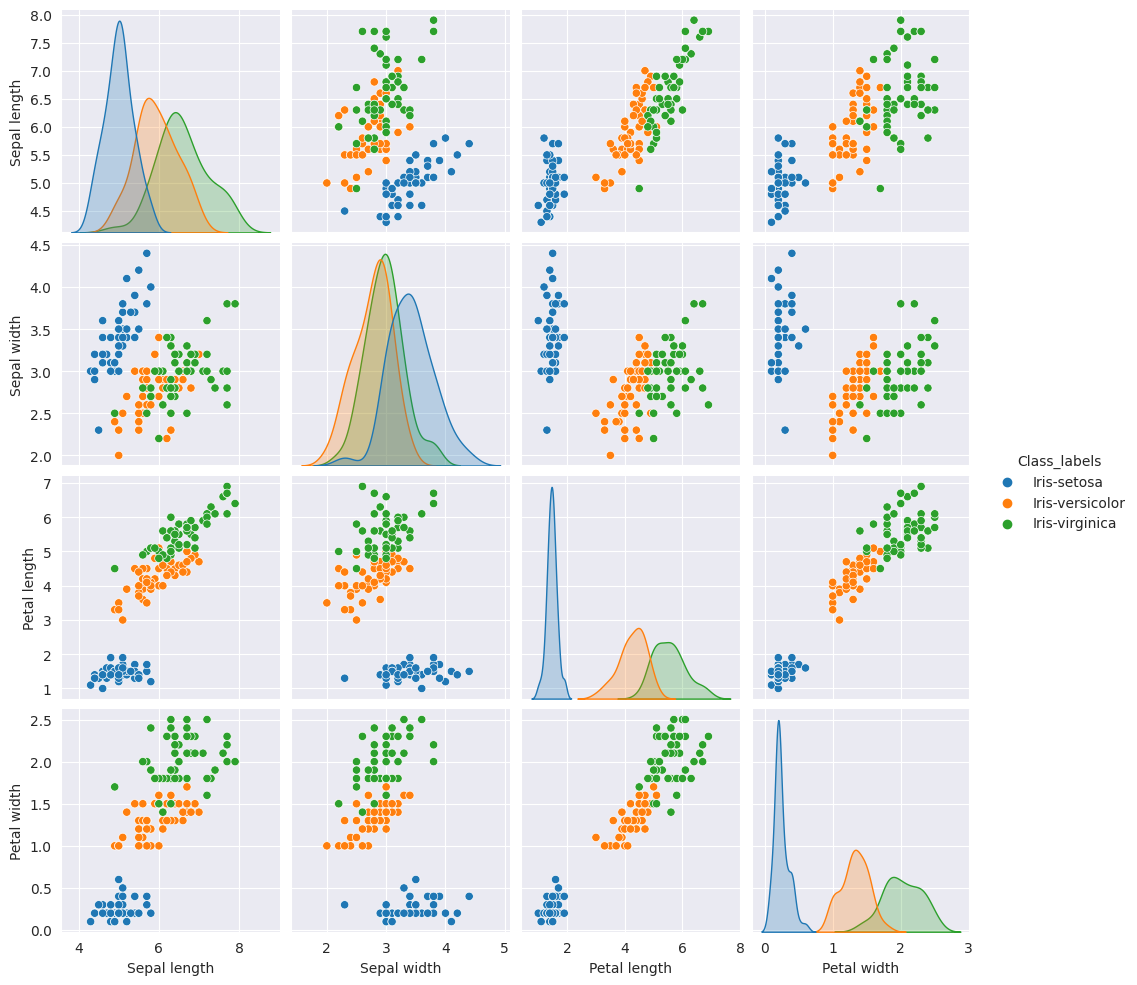

In [6]:
# Plot pairwise relationships in the Iris dataset.
# hue option introduces different colors in output.
# Each class gets its own color.
sb.pairplot(data, hue='Class_labels')

# Plotting iris.data.csv using np.genfromtxt function

In [ ]:
data = np.genfromtxt('iris.data.csv', dtype=str, delimiter=',')

# We can not just retype data on PandasFrame because data has string values.
l = []

for i in range(len(data)):
    helper_list = []

    for j in range(len(data[i]) - 1):
        helper_list.append(float(data[i][j]))

    helper_list.append(data[i][4])
    l.append(helper_list)

# Convert list to Panda's Dataframe for further plotting.
l = pd.DataFrame(l, columns = columns)
# l.head()
# l.describe()
sb.pairplot(l, hue = 'Class_labels')

---
#### Read iris data using sklearn.dataset library

In [17]:
# iris.data.csv could be taken from sklearn.datasets.
from sklearn.datasets import load_iris

# To see more about load_iris() visit: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
data = load_iris()

In [25]:
# Let us list several methods.
print(f"Whole data: \n {data.data}:")
print("\n")

print(f"Classes names: \n {data.feature_names}:")
print("\n")

print(f"Data targets: \n {data.target}")

Whole data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

In [51]:
# Now we want to join data with it's targets.
# Firstly we transpose target (to get column) and then we join it with data
# using np.concatenate function with axis = 1 (which will join data and targets
# with respect to the last coordinate).
full_data = np.concatenate((data.data, data.target.reshape(-1, 1)), axis = 1)

# +['Species'] adds it to the end of data.feature_names.
columns = data.feature_names + ['Species']

# Convert full_data to the Pandas DataFrame.
df = pd.DataFrame(full_data, columns  = columns)

# Now we want to drop all rows which corresponds to the class number 2
# (standard theory separates two classes but in more general case it is not a problem).
# To do so we use df.drop(index_of_rows_to_remove, inplace = True).

# Creates a boolean mask where rows which satisfies the condition df[Species] == 2
# have true value at the end.
boolean_mask = (df['Species'] == 2)

# Returns indexes of rows which have True at the end.
list_of_indexes = df[boolean_mask].index
df.drop(list_of_indexes, inplace = True)

# Removes columns (if axis = 1) with names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'].
df.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], axis = 1, inplace = True)

print(df)

    petal width (cm)  Species
0                0.2      0.0
1                0.2      0.0
2                0.2      0.0
3                0.2      0.0
4                0.2      0.0
..               ...      ...
95               1.2      1.0
96               1.3      1.0
97               1.3      1.0
98               1.1      1.0
99               1.3      1.0

[100 rows x 2 columns]


#### Logistic Regression using sklearn module

In [54]:
X = np.array(df['petal width (cm)']).reshape(-1,1)
Y = np.array(df['Species'], dtype = int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [95]:
# Split the data into training (80%) and testing (20%) datasets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

print(f'Number of {data.target_names[1]} samples in the data: {sum(Y)} out of {len(Y)}')
print(f'Number of {data.target_names[1]} samples in the train dataset: {sum(y_train)} out of {len(y_train)}')
print(f'Number of {data.target_names[1]} samples in the test dataset: {sum(y_test)} out of {len(y_test)}')

Number of versicolor samples in the data: 50 out of 100
Number of versicolor samples in the train dataset: 40 out of 80
Number of versicolor samples in the test dataset: 10 out of 20


In [89]:
# Imagine that we consider two groups of people: without obesity (number 0), with obesity (number 1).
# Suppose that our goal is to predict whether some person belongs to 1 or to 0 based only on his weight.
# Clearly it is not possible to split those two groups linearly, i.e. if person has for example 90 kg
# he is not necessary with obesity (because for example of hist height, muscles and so on) and vice versa
# if somebody has small weight it is not sure that he belongs to without obesity class.
# In our case we have the data about flowers. Our goal is to predict whether flower belongs to 0 or to 1.
# To do so we use this data to "train" model which will predict the classification of flowers.
# We use Logistic Regression. If you want to understand the mathematical model of that regression visit:
# https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit model by train data.
model.fit(X_train, y_train)

# Save predictions of X_train and X_test for further test.
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [91]:
# Confusion matrix brings the information about how good
# is our trained model.
# Note: we are interested on checking how good the model is on test data.
# To see more about confusion matrix visit:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(y_test, y_predict_test)

array([[10,  0],
       [ 0, 10]])

In [92]:
# Accuracy is (TP + TN) / (all_data). To see more visit:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy_score(y_test, y_predict_test)

1.0

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bogdanpetraszczuk/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

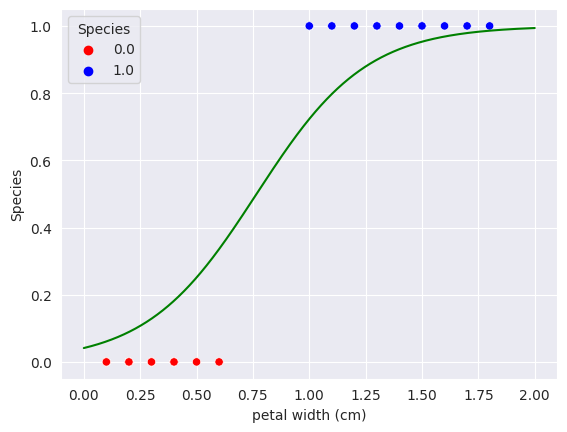

In [74]:
X_new = np.linspace(0, 2, 2000).reshape(-1, 1)

y_predict_new = model.predict_proba(X_new)

# Basically the Logistic regression is the curve plotted with next three commands.
# We have here two possibilities: the flower with petal width belongs to 0 or belongs to 1.
# This curve is fitted in the best way to represent whether the flower belongs to 0 or 1.
# Clearly if width of flower is > 0.75 then "species" > 0.5 which means that these flower is from 1.
sb.scatterplot(x = "petal width (cm)", y = "Species", data = df, hue = 'Species', palette = ['red', 'blue'])
plt.plot(X_new, y_predict_new[:, 1], "g")
plt.show()

---
#### ROC curve

In [81]:
from sklearn import metrics

y_test_prediction = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prediction)
auc = metrics.roc_auc_score(y_test, y_test_prediction)

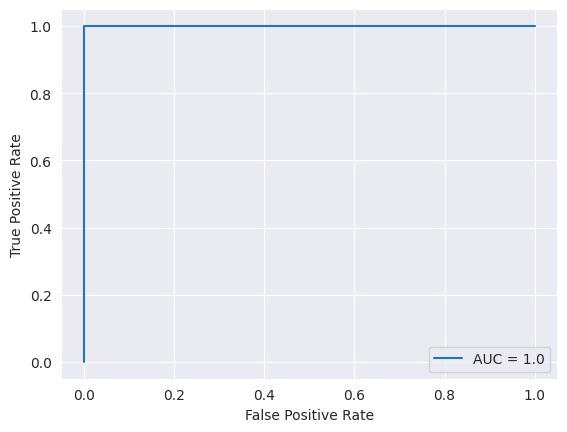

In [82]:
# Plot ROC curve.
# Here AUC is the area under a ROC curve.
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

---
#### "Manual" fitting of the logistic regression model: gradient descent in detail

We want to maximise $l(\beta)$, thus minimise $-l(\beta)$ (see slides). We calculate the gradient of $-l(\beta)$, which is given by the following equations:

$$
\frac{\partial (-l(\beta))}{\partial \beta_0} = \sum_{i=1}^{N}(p(x_i;\beta) - y_i)
$$

and for $k=1,2,\ldots,k$:

$$
\frac{\partial (-l(\beta))}{\partial \beta_0} = \sum_{i=1}^{N}x_{ij}(p(x_i;\beta) - y_i).
$$

In [84]:
def sigmoid_function(x, beta, beta0):
    # Here x.dot(beta) is the scalar product of vectors x and beta:
    # x.dot(beta) = <x, beta> = x_1 * beta_1 + ... + x_n * beta_n

    return 1 / (1 + np.exp( -(x.dot(beta) + beta0)) )

In [101]:
# x - data vector,
# y - labels / real values / number of class,
# epochs - number of iterations to update model.
# learning_rate - must be small. This constant is a hyper-parameter used
# to govern the pace at which an algorithm updates or learns the values of a parameter estimate.
def gradient_descent(x, y, epochs, learning_rate):
    num_samples, num_features = x.shape

    # Here we can initiate beta and beta0 randomly.
    # It will be updated epochs number of time.
    beta = np.zeros(num_features)
    beta0 = 0

    for i in range(epochs):
        predict_of_x = sigmoid_function(x, beta, beta0)

        # Measure how different is prediction from the
        # real value.
        diff = predict_of_x - y.T

        # Reshape to get again 1-D vector.
        diff = np.reshape(diff, num_samples)

        update_beta_scalar = np.dot(x.T, diff)
        update_beta0_scalar = np.sum(diff)

        # Updating weights.
        beta = beta - learning_rate * update_beta_scalar
        beta0 = beta0 - learning_rate * update_beta0_scalar

    return beta, beta0

def predict(x, beta, beta0, thr = 0.5):
    # Using the updated values of weights (look gradient_descent function above)
    # computes the probability of x (the clarification of what I mean
    # by saying probability is in the next comment).
    probability = sigmoid_function(x, beta, beta0)

    # If the above probability is greater than some thrash value
    # then we classify to the 1 if is less then we classify x to 0.
    # Usually thr = 0.5.
    y = np.where(probability > thr, 1, 0)

    return y, probability

# Model training: fitting beta and beta0 with gradient descent.
beta, beta0 = gradient_descent(X_train, y_train, 1000, 0.01)

# Predictions.
y_pre_scratch, p_pre_scratch = predict(X_test, beta, beta0)

In [102]:
confusion_matrix(y_test, y_pre_scratch)

array([[10,  0],
       [ 0, 10]])

In [103]:
accuracy_score(y_test, y_pre_scratch)

1.0